## Dogs vs Cats Convolutional Neural Networks Classification

### Problem Statement: 

In this Code,  we are implementing Convolution Neural Network (CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 2,000 and final testing is done on seperate 400 images.

This Dataset is taken from this [link](https://drive.google.com/drive/u/0/folders/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD)

### Dependencies 
 - Jupyter Notebook
 - Tensorflow
 - Python 3.6
 - Matplotlib
 - Seaborn
 - Scikit-Learn
 - Pandas
 - Numpy

### Test-Train Split
Image training set contain 2400 images for each category. I split those into 80% train and 20% means test Split each class images into 2000 for train and 400 for test.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

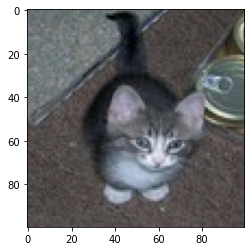

In [13]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

MODEL TRAINING

In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 12s 349ms/step - loss: 0.7567 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 12s 362ms/step - loss: 0.6643 - accuracy: 0.5810
Epoch 3/5
32/32 [==============================] - 11s 346ms/step - loss: 0.6015 - accuracy: 0.6885
Epoch 4/5
32/32 [==============================] - 11s 340ms/step - loss: 0.5448 - accuracy: 0.7290
Epoch 5/5
32/32 [==============================] - 11s 339ms/step - loss: 0.4917 - accuracy: 0.7690


In [19]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 58ms/step - loss: 0.5895 - accuracy: 0.6925


[0.5894961953163147, 0.6924999952316284]

MAKE PREDICTIONS

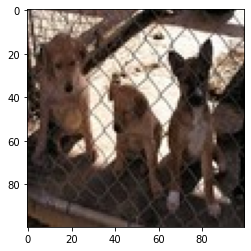

1/1 [==============================] - 0s 21ms/step
Our model says it is a : dog


In [22]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

### CONCLUSION
The Architecture and parameter used in this network are capable of producing accuracy of 76.90% on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using more evaluation and by running more epochs.